In [7]:
import numpy as np
import matplotlib.pyplot as plt

from base import (
    HomogeneousPopulationSusceptibilityModel,
    HeterogeneousPopulationSusceptibilityModel,
)

In [8]:
antibody_model_params_pop = {
    "mrna_dose": 100,
    "mrna_decay_rate": np.log(2),
    "delay_to_antibody_response": 4.1,
    "max_antibody_production_rate": 6472.4,
    "mrna_response_steepness": 0.0163,
    "half_maximal_response_mrna": 28100,
    "antibody_decay_rate": 0.875,
}
antibody_model_params_random_effects = {key: 0 for key in antibody_model_params_pop}
susceptibility_func_params = {
    "antibody_response_steepness": 3 / np.log(10),
    "half_protection_antibody": 114.92 * np.exp(0.2 * np.log(10)),
}

period = 360
vaccination_time_range = [0, 90]
proportion_vaccinated = 0.8
population_size = 100
rng_seed = 0

In [9]:
susceptibility_model_homog = HomogeneousPopulationSusceptibilityModel(
    vaccination_time_range=vaccination_time_range,
    proportion_vaccinated=proportion_vaccinated,
    period=period,
    antibody_model_params=antibody_model_params_pop,
    susceptibility_func_params=susceptibility_func_params,
)

In [10]:
susceptibility_model = HeterogeneousPopulationSusceptibilityModel(
    vaccination_time_range=vaccination_time_range,
    proportion_vaccinated=proportion_vaccinated,
    period=period,
    antibody_model_params_pop=antibody_model_params_pop,
    antibody_model_params_random_effects=antibody_model_params_random_effects,
    susceptibility_func_params=susceptibility_func_params,
    population_size=population_size,
    rng_seed=rng_seed,
)

In [11]:
time_vec = np.arange(720)
susceptibility_vec = susceptibility_model.susceptibility(time_vec)
susceptibility_vec_homog = susceptibility_model_homog.susceptibility(time_vec)

(0.0, 1.0)

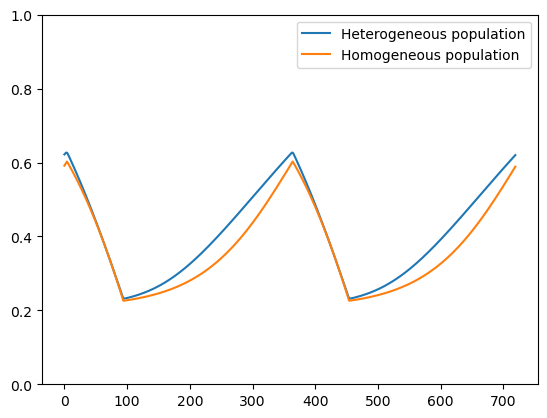

In [12]:
plt.plot(time_vec, susceptibility_vec, label="Heterogeneous population")
plt.plot(time_vec, susceptibility_vec_homog, label="Homogeneous population")
plt.legend()
plt.ylim(0, 1)